# Project Overview: Penguin Species Classification
Objective:
The objective of this project was to survey different machine learning models to organize and classify a dataset of penguin species.




# Abstract

In this project, I surveyed different machine learning models to organize and classify a dataset on various penguin species. Initially, I imported the data and conducted preliminary cleaning, including dropping unnecessary columns. Following this, I performed exploratory data analysis to uncover general trends within the penguin data. Systematic feature selection was then employed to identify the most significant variables for predicting species. To prepare for the machine learning phase, I split the data into features (X) and target (y) variables, and further divided it into training and testing sets. After an additional round of data preparation to ensure only relevant columns were included, I implemented three machine learning models: Support Vector Machine, Random Forest, and Multinomial Logistic Regression. I evaluated the performance of these models using various statistical measures and assessed the limitations of each approach. The report concludes with a discussion section that summarizes the analysis and overall findings, providing insights and potential directions for future research.

# **1) Data Import and Cleaning**

The first step in this project is to import the data used in the project and the necessary libraries.

In [1]:
# Libraries used for this project
import pandas as pd
import numpy as np
import urllib
from matplotlib import pyplot as plt
from sklearn import preprocessing
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Read in penguins data set
df = pd.read_csv('data/palmer_penguins.csv')

Next, I will take an initial look at our dataframe to understand our data first before conducting an exploratory analysis. Before conducting an analysis, it is imperative that we first understand what an observation looks like in the dataset and know the variables we will be workikng with.

In [2]:
df.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


In [3]:
# Inspect shape of data
df.shape

(344, 17)

In [4]:
# Looking at unique values 
df.nunique() 

studyName                3
Sample Number          152
Species                  3
Region                   1
Island                   3
Stage                    1
Individual ID          190
Clutch Completion        2
Date Egg                50
Culmen Length (mm)     164
Culmen Depth (mm)       80
Flipper Length (mm)     55
Body Mass (g)           94
Sex                      3
Delta 15 N (o/oo)      330
Delta 13 C (o/oo)      331
Comments                 7
dtype: int64

Looking at the unique values for each column in the dataframe, we can see that the `Region` and `Stage` columns only have one unique value. Therefore, it is sensible to remove these columns since they will not help with modeling. The `studyName`, `Sample Number`, and `Individual ID` columns can be removed since they are ID columns. We can also get rid of the `Comments` and `Date Egg` columns since we are not interested in these columns and they are irrelevant to modeling.

In [5]:
# Drop unnecessary columns from dataframe
df = df.drop(columns=['Region', 'Stage', 'studyName', 'Sample Number', 'Individual ID', 'Comments', 'Date Egg'])

In [6]:
# Inspecting how many NAs are in the data
df.isna().sum()

Species                 0
Island                  0
Clutch Completion       0
Culmen Length (mm)      2
Culmen Depth (mm)       2
Flipper Length (mm)     2
Body Mass (g)           2
Sex                    10
Delta 15 N (o/oo)      14
Delta 13 C (o/oo)      13
dtype: int64

Next, I will shorten the values of `Species` to the first word of each value since the first word uniquely identifies each category. This will enchance readability and manageability of the data.

In [7]:
# Shorten names
df['Species'] = df['Species'].str.split().str[0]

Now we are ready to dig deeper into our data and conduct an exploratory analysis.

# **2) Exploratory Analysis**

Since we are working with many features and observations, it is important that we further analyze the features that will potentially be used in the machine learning models. This exploratory analysis serves to help us identify the important features that will build our models. I am looking for features that demonstrate evident data clusters and relevant information about the various penguin species. In the future, we can also refer back to this analysis to compare to any other findings we have down the road.


#### **Summary Table**

The first step in my exploratory analysis is to create a summary table. This table will help me easily understand the data better because individually inspecting 344 observations and 17 features would be time consuming and inefficient. This summary table aims to summarize the dataset into a readable and manageable table. More specifically, I am able to look at summary statistics such as mean and standard deviation for different features and combinations. Using the `groupby()` method allows us to create a detailed summary about our features. Below is the summary table summarizing quantitative variables grouped by the qualitative variables. The process used to create this table is as follows:

1. Split the dataframe into groups by our qualitative features
2. Apply `np.mean` and `np.std` as aggregate functions to the dataframe
3. Combine our results into a data structure

In [8]:
values = ["Culmen Length (mm)", "Culmen Depth (mm)", 
          "Flipper Length (mm)", "Body Mass (g)",
          "Delta 15 N (o/oo)", "Delta 13 C (o/oo)"]
df.groupby(["Species", "Island", "Sex"])[values].aggregate([np.mean,np.std]).round(2)

Culmen Length (mm)       Culmen Depth (mm)        \
                                         mean   std              mean   std   
Species   Island    Sex                                                       
Adelie    Biscoe    FEMALE              37.36  1.76             17.70  1.09   
                    MALE                40.59  2.01             19.04  0.88   
          Dream     FEMALE              36.91  2.09             17.62  0.90   
                    MALE                40.07  1.75             18.84  1.03   
          Torgersen FEMALE              37.55  2.21             17.55  0.88   
                    MALE                40.59  3.03             19.39  1.08   
Chinstrap Dream     FEMALE              46.57  3.11             17.59  0.78   
                    MALE                51.09  1.56             19.25  0.76   
Gentoo    Biscoe    .                   44.50   NaN             15.70   NaN   
                    FEMALE              45.56  2.05             14.24  0.54   
                    MALE                49.47  2.72             15.72  0.74   

                           Flipper Length (mm)       Body Mass (g)          \
                                          mean   std          mean     std   
Species   Island    Sex                                                      
Adelie    Biscoe    FEMALE              187.18  6.74       3369.32  343.47   
                    MALE                190.41  6.46       4050.00  355.57   
          Dream     FEMALE              187.85  5.51       3344.44  212.06   
                    MALE                191.93  6.80       4045.54  330.55   
          Torgersen FEMALE              188.29  4.64       3395.83  259.14   
                    MALE                194.91  5.92       4034.78  372.47   
Chinstrap Dream     FEMALE              191.74  5.75       3527.21  285.33   
                    MALE                199.91  5.98       3938.97  362.14   
Gentoo    Biscoe    .                   217.00   NaN       4875.00     NaN   
                    FEMALE              212.71  3.90       4679.74  281.58   
                    MALE                221.54  5.67       5484.84  313.16   

                           Delta 15 N (o/oo)       Delta 13 C (o/oo)        
                                        mean   std              mean   std  
Species   Island    Sex                                                     
Adelie    Biscoe    FEMALE              8.77  0.40            -25.92  0.60  
                    MALE                8.87  0.37            -25.92  0.50  
          Dream     FEMALE              8.91  0.50            -25.74  0.58  
                    MALE                8.98  0.32            -25.76  0.63  
          Torgersen FEMALE              8.66  0.50            -25.74  0.67  
                    MALE                8.92  0.41            -25.84  0.56  
Chinstrap Dream     FEMALE              9.25  0.32            -24.57  0.24  
                    MALE                9.46  0.39            -24.53  0.24  
Gentoo    Biscoe    .                   8.04   NaN            -26.18   NaN  
                    FEMALE              8.19  0.28            -26.20  0.53  
                    MALE                8.30  0.25            -26.17  0.55

From this table, we are able to observe that there are noticeable differences in `MALE` and `FEMALE` penguins in almost every quantitative feature. This difference between males and females seems most apparent when observing `Culmen Depth (mm)` and `Culmen Length (mm)`. On average, male penguins have greater measurements than female penguins. Although not as noticeable, we can observe some differences in penguin measurements among islands.

Another small observation is that there is a penguin with `Sex` value `'.'`. This is something small to keep in mind when looking further into the `Sex` feature and making visualizations.

A summary table is great first step for learning more about a dataset, but data visualizations can provide us with more information about our data and help us extract more insights. Visualizations will provide us with more observations so that we can build off our initial findings from our table since pictures and plots can provide more information then simply looking at numbers.

#### **Data Visualizations**

A scatter plot will help us visualize any clusters of data points among the three different species of penguins. By looking at scatter plots comparing different quantitative variables, we are able to look for any interactions between features that may be helpful for our models.

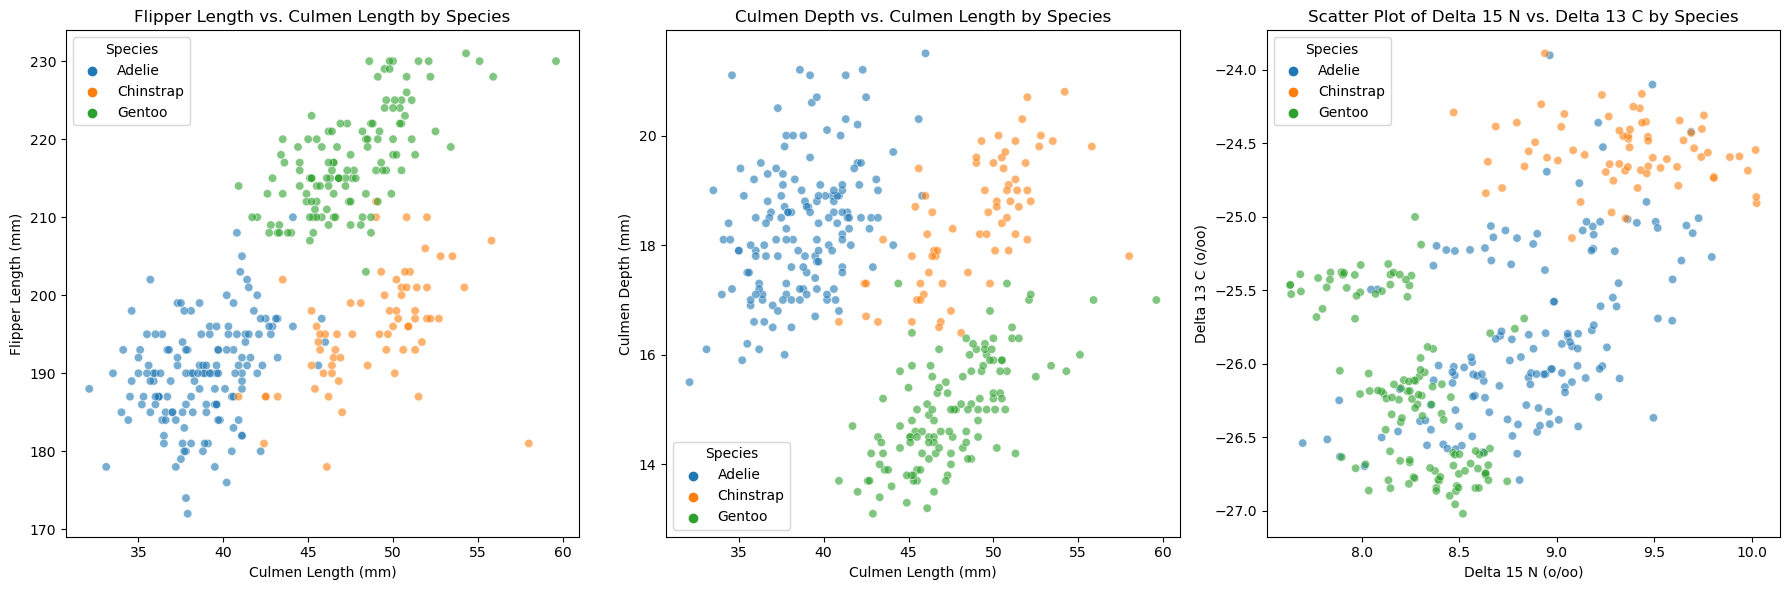

In [9]:
# Define plot & labels
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0] = sns.scatterplot(ax=axes[0], data=df, x='Culmen Length (mm)', y='Flipper Length (mm)', hue='Species', alpha = .6)
axes[0].set_title('Flipper Length vs. Culmen Length by Species')

axes[1] = sns.scatterplot(ax=axes[1], data=df, x='Culmen Length (mm)', y='Culmen Depth (mm)', hue='Species', alpha = .6)
axes[1].set_title('Culmen Depth vs. Culmen Length by Species')

axes[2] = sns.scatterplot(ax=axes[2], data=df, x='Delta 15 N (o/oo)', y='Delta 13 C (o/oo)', hue='Species', alpha = .6)
axes[2].set_title('Scatter Plot of Delta 15 N vs. Delta 13 C by Species')


plt.tight_layout()
plt.show()

Observations: The Flipper Length vs. Culmen Length by Species graph and Culmen Depth vs Culmen Length by Species graph have noticeable clustering. There are clear groups in these graphs with not too many observations from different species overlapping each other. These variables may help the predictive power of our models and it is worth looking further into these variables. On the other hand, the Delta 15 N vs. Delta 13 C by Species graph does not demonstrate strong clustering and the observations from different species are often overlapping. It is harder to identify separate groups of data in this graph than the other two. The Delta 15 N and Delta 13 C features may not be as helpful as the others in our models.

The next thing I wanted to look at was the `Island` variable to see the frequency of penguins on each island. This heatmap aims to visualize the distribution of penguins from each species on each island.

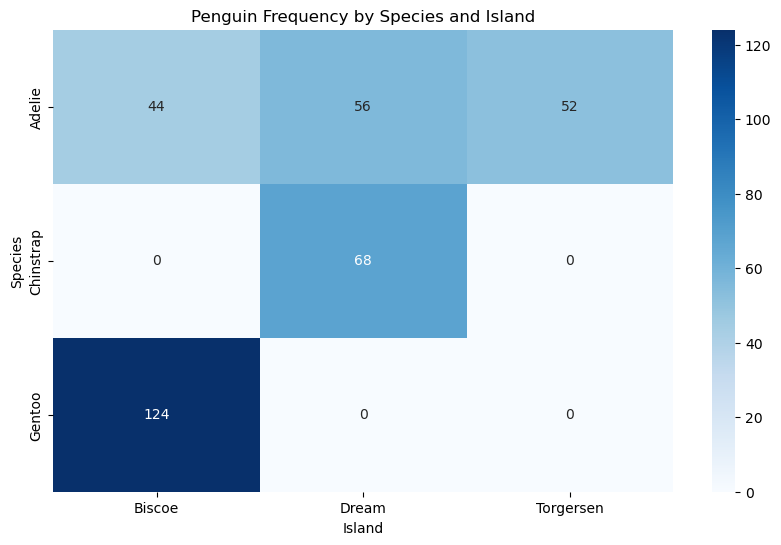

In [10]:
# Create pivot table
pivot_table = df.pivot_table(index='Species', columns='Island', aggfunc='size', fill_value=0)

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='Blues', fmt='d')
plt.title('Penguin Frequency by Species and Island')
plt.xlabel('Island')
plt.ylabel('Species')
plt.show()

Observations: Some species of penguins are only found on certain islands. For example, the Gentoo species is only found on the Biscoe island. Therefore, if we are presented with a penguin from the Biscoe island we can deduce  that the penguin would be Gentoo or Adelie. Another example of this is the Chinstrap species which can only be found on Dream Island. Lastly, the Adelie is found on every island and is the only penguin on the Torgersen island. The `Island` feature could be a useful qualitative feature when we get to building our models.

Next, I am interested in further analyzing the differences between male and female penguins. I created a box plot to look at these differences between males and females as well as species. Box plots are helpful since they visualize distributions and make it easy to compare different groups. In the box plot below, I am looking at Body Mass by Species and Sex. Since I am looking at `Sex`, I decided to ignore the observation with `'.'` sex since there is only one penguin with that value.

In [11]:
df['Sex'].value_counts()

Sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64

[Text(0.5, 1.0, 'Body Mass (g) by Species and Sex')]

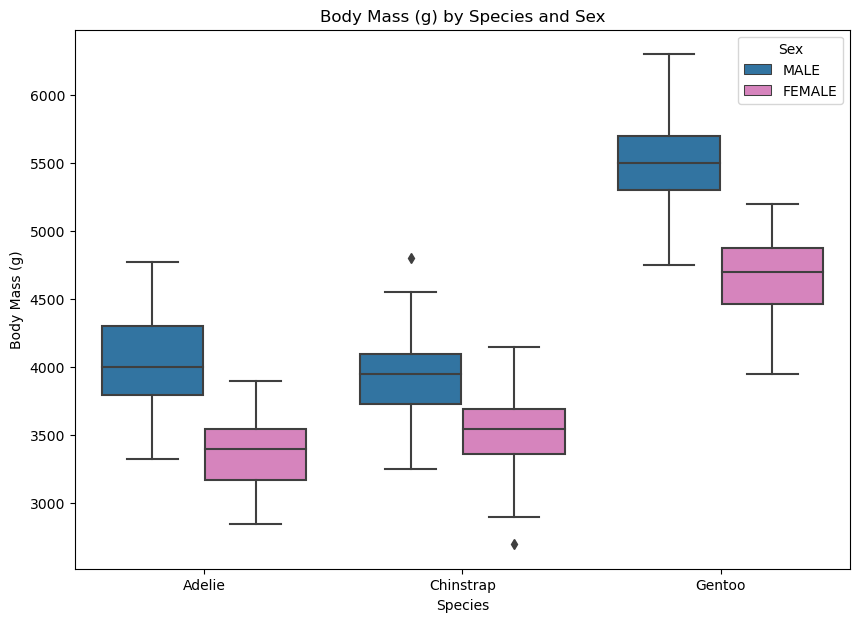

In [12]:
# Box plot grouped by sex
fig, ax = plt.subplots(1, figsize = (10, 7))
ax = sns.boxplot(data = df[df['Sex'] != '.'] , x="Species", y="Body Mass (g)", hue = "Sex", palette = ['tab:blue','tab:pink'])                                                                                                 
ax.set(title = "Body Mass (g) by Species and Sex")

Observations: The Gentoo penguin males and females having a considerably larger body mass than the other two species stood out immediately to me. The box plot also confirms my previous observation that males have larger measurements than females across all species. `Sex` seems like it is a promising feature, so when we prepare the data for modeling we should get rid of the penguin with `'.'` as its `Sex` value. `Sex` is an important variable and the penguin with the `'.'` value does not provide us with valuable information.

In [13]:
df = df[df['Sex'] != '.']

I also wanted to solely look at the distribution of body mass of penguins by island. By grouping the penguins by island and making a histrogram, I visualized the differences in weight among penguins. 

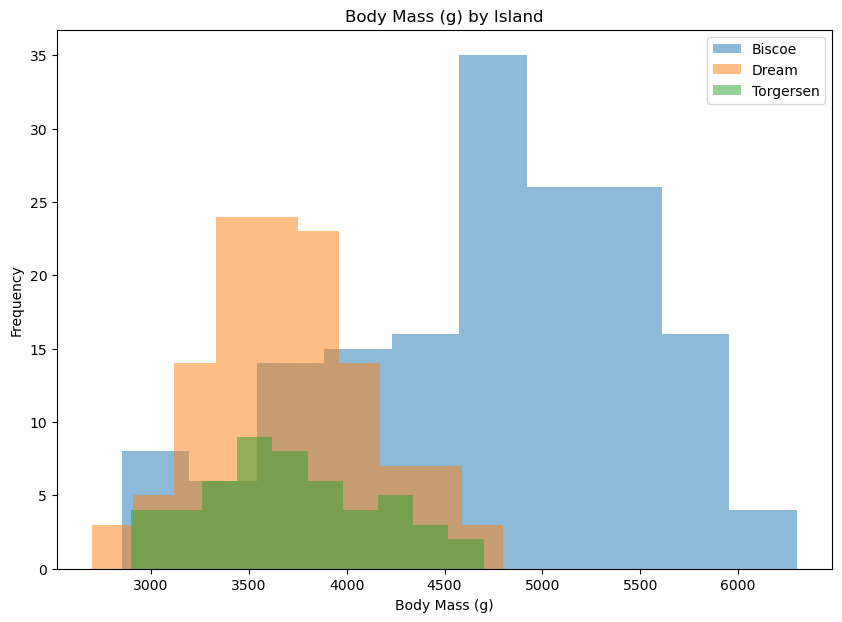

In [14]:
# Histogram of Body Mass (g) grouped by Island
fig, ax = plt.subplots(1, figsize = (10, 7))
ax.set(xlabel = "Body Mass (g)", ylabel = "Frequency", title = "Body Mass (g) by Island")

# Define sets
island = set(df["Island"])

#Nested for loop to iterate through species and island lists to form histogram
for i in island:
    weight = df[(df["Body Mass (g)"].notnull()) & (df["Island"] == i)]
    ax.hist(weight["Body Mass (g)"], label = i, alpha = 0.5)
    
ax.legend()

Observations: It is evident that the penguins from the Biscoe island are the heaviest. This makes sense because Gentoo penguins primarily live on this island and they are the heaviest. In addition, the penguins from Dream Island and Torgersen have similar body mass distributions. 

Lastly, I wanted to look into Clutch Completion to see if it was a variable worth including into the models. By making a grouped barchart, we are able to see if clutch completion differs by species.

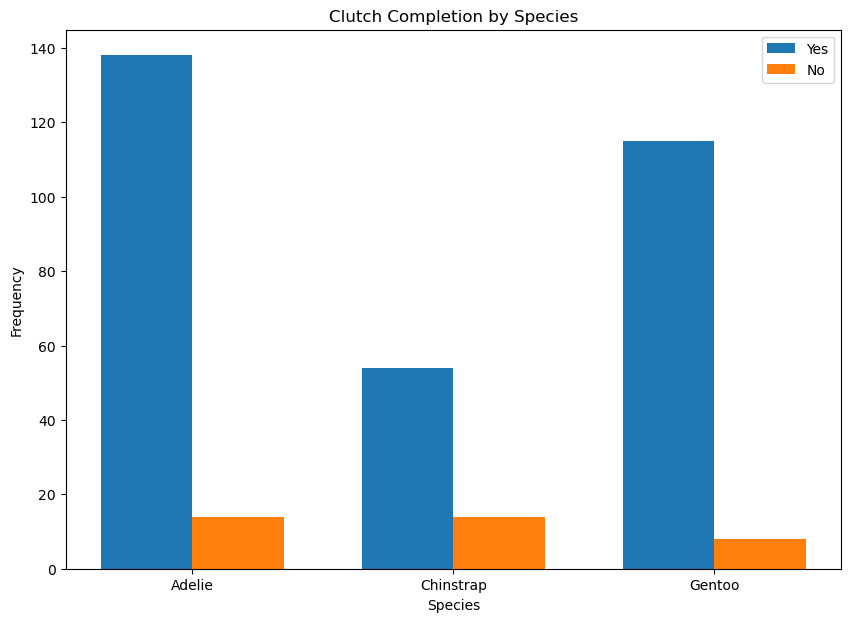

In [15]:
# Grouping by 'Species' and 'Clutch Completion', then getting value counts
grouped_counts = df.groupby(['Species', 'Clutch Completion']).size().unstack()

# Define plot
fig, ax = plt.subplots(figsize = (10, 7))
width = 0.35  # width of the bars
x = range(len(grouped_counts.index))

# Plot 'Yes'
ax.bar(x, grouped_counts['Yes'], width, label='Yes')

# Plot 'No'
ax.bar([i + width for i in x], grouped_counts['No'], width, label='No')

# Adding labels, title, and legend
ax.set_xlabel('Species')
ax.set_ylabel('Frequency')
ax.set_title('Clutch Completion by Species')
ax.set_xticks([i + width / 2 for i in x])
ax.set_xticklabels(grouped_counts.index)
ax.legend()

plt.show()

Observations: The main takeaway from this graph is that all species have more `Yes` than `No` with `Yes` having substantially more observations than `No` in all species. There are not any noticable differences among species, so this variable is not worth including in our model.

In [16]:
df = df.drop(["Clutch Completion"], axis = 1)

After analyzing our data and getting an idea of which variables would provide the best predictive power, we will further narrow the data through feature selection. This step will provide us with the optimal features (one qualitative feature and two quantitative features) to use in our models.

# **3) Feature Selection**

Before getting into feature selection, I need to prepare the data first. First, I will split the data into train and test data with an 80/20 split using the `train_test_split()` function. 

Next, I created a function `prep_penguin_data()` to help me clean the data since I have two dataframes to clean (`train` and `test`). This function cleans the dataset by first making a copy so that the original dataframe is not changed. We want to maintain the original dataframe because based on the feature selection, we will clean our data according to the three columns we will use in our models. Then, the function drops all the NAs from the dataset so that we could use a Logistic Regression model. Next, it encodes the categorical features in the data using integers. Lastly, it sets the `Species` column as the dependent variable `y` and the other columns as the independent/predictor variables `X`.

After this step, I will take the 20% of data from the split and "hide" it from the model. The other 80% of remaining data will be used to train our model on real data and give us insights on which variables to use through cross-validation. Then I will apply the model using test data to verify the best combination of features. 

In [17]:
np.random.seed(100)
train, test = train_test_split(df, test_size = 0.2, random_state=2021)

def prep_penguin_data(df_data):
    """
    Preps penguin data file for feature selection.
    Takes in file and makes a copy and drops rows that have an nan in it.
    Also creates X and y variables where y is the target variable ("Species") and X is the the rest of the column 
    variables. 
    
    Parameters: 
    df_data (Dataframe): Dataframe to prep
    
    Returns: Two variables, target variable and independent variables.
    """
    data = df_data.copy() # make a copy of dataframe
    
    data = data.dropna() # drop NAs
    
    le = preprocessing.LabelEncoder()
    data["Sex"] = le.fit_transform(data["Sex"]) # encode sex
    data['Island'] = le.fit_transform(data['Island']) # encode island

        
    X = data.drop(["Species"], axis = 1) # set independent variables
    y = data["Species"] # set target variable
    
    return(X,y)

X_train, y_train = prep_penguin_data(train)
X_test, y_test = prep_penguin_data(test)

In [18]:
def check_col_score(cols):
    """
    Trains and evaluates a model via cross-validation on the columns in cols and returns the CV score.
    
    Parameters:
    cols (list): List of strings on which columns to use
    
    Returns: train score from Logistic Regression
    """
    print("Training with columns " + str(cols))
    
    LR = LogisticRegression(max_iter = 1000)
    return cross_val_score(LR, X_train[cols], y_train, cv = 5).mean()

In [19]:
combos = [['Culmen Length (mm)', 'Culmen Depth (mm)', 'Island'],
         ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Sex'],
         ['Culmen Length (mm)', 'Flipper Length (mm)', 'Island'],
         ['Culmen Length (mm)', 'Flipper Length (mm)', 'Sex'],
         ['Culmen Length (mm)', 'Body Mass (g)', 'Island'],
         ['Culmen Length (mm)', 'Body Mass (g)', 'Sex'],
         ['Culmen Depth (mm)', 'Flipper Length (mm)', 'Island'],
         ['Culmen Depth (mm)', 'Flipper Length (mm)', 'Sex'],
         ['Culmen Depth (mm)', 'Body Mass (g)', 'Island'],
         ['Culmen Depth (mm)', 'Body Mass (g)', 'Sex'],
         ['Flipper Length (mm)', 'Body Mass (g)', 'Island'],
         ['Flipper Length (mm)', 'Body Mass (g)', 'Sex']]

for cols in combos:
    x = check_col_score(cols)
    print("CV score is " + str(x))

Training with columns ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Island']
CV score is 0.97322206095791
Training with columns ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Sex']
CV score is 0.9923802612481858
Training with columns ['Culmen Length (mm)', 'Flipper Length (mm)', 'Island']
CV score is 0.9694484760522496
Training with columns ['Culmen Length (mm)', 'Flipper Length (mm)', 'Sex']
CV score is 0.97322206095791
Training with columns ['Culmen Length (mm)', 'Body Mass (g)', 'Island']
CV score is 0.9616835994194485
Training with columns ['Culmen Length (mm)', 'Body Mass (g)', 'Sex']
CV score is 0.9731494920174166
Training with columns ['Culmen Depth (mm)', 'Flipper Length (mm)', 'Island']
CV score is 0.827866473149492
Training with columns ['Culmen Depth (mm)', 'Flipper Length (mm)', 'Sex']
CV score is 0.8238751814223513
Training with columns ['Culmen Depth (mm)', 'Body Mass (g)', 'Island']
CV score is 0.7969521044992742
Training with columns ['Culmen Depth (mm)', 'Body Mass (g)', 

In [20]:
def test_col_score(cols):
    """
    Trains and evaluates a model on the test set using cols and returns the score on the test set.
    
    Parameters:
    cols (list): List of strings on which columns to use
    
    Returns: test score from Logistic Regression
    """
    print("Testing with columns " + str(cols))
    LR = LogisticRegression(max_iter = 1000)
    LR.fit(X_train[cols], y_train)
    return LR.score(X_test[cols], y_test)

In [22]:
for cols in combos:
    x = test_col_score(cols)
    print("The test score is " + str(x))

Testing with columns ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Island']
The test score is 0.9682539682539683
Testing with columns ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Sex']
The test score is 0.9841269841269841
Testing with columns ['Culmen Length (mm)', 'Flipper Length (mm)', 'Island']
The test score is 0.9047619047619048
Testing with columns ['Culmen Length (mm)', 'Flipper Length (mm)', 'Sex']
The test score is 0.9047619047619048
Testing with columns ['Culmen Length (mm)', 'Body Mass (g)', 'Island']
The test score is 0.9523809523809523
Testing with columns ['Culmen Length (mm)', 'Body Mass (g)', 'Sex']
The test score is 0.9841269841269841
Testing with columns ['Culmen Depth (mm)', 'Flipper Length (mm)', 'Island']
The test score is 0.8095238095238095
Testing with columns ['Culmen Depth (mm)', 'Flipper Length (mm)', 'Sex']
The test score is 0.8253968253968254
Testing with columns ['Culmen Depth (mm)', 'Body Mass (g)', 'Island']
The test score is 0.7777777777777778
Testing wit

Using cross_val_score allows us to see the best feature combinations by giving us the highest score. Above I printed the CV score for each possible feature combination and found the best combination.

Based on the feature selection, I found the best combination of three variables to be `Sex`, `Culmen Depth (mm)`, and `Culmen Length (mm)` since it had the best score training and testing. This combination gave us a score of 0.984 on our testing data. Although, `Culmen Length (mm)`, `Body Mass (g)`, `Island` is a consideration, but the other combination performed similarly on the testing data while having a better score on the training data. 

Now that we know which combination is the best, I will clean the columns accordingly to prepare our data for machine learning models.

To prepare the data, I created a function `prep_penguin_data_2()` and took a similar approach to the previous function we made. I started by making a copy of the dataframe and dropping the NAs only from the `Sex` column since this is an important column used for our models and the NAs from this column can not be substituted. After this, I considered filling the NAs in the other quantitative columns with the means from their respective columns; however, the NAs in these columns happened to be the same NAs removed from the `Sex` column. Next, I encoded the `Sex` and `Species` columns with integers so that they can be used in the models. `Species` was encoded so that it could be used in a decision region plot used after we built our models. Lastly, I set the `Species` column as the dependent variable `y` and the other three columns as the independent variables `X`. After this step, we are ready to start modeling.

In [23]:
def prep_penguin_data_2(df_data):
    
    """
    Takes in dataframe and preps it for modeling based on our feature selection.
    Drops nan's in the the sex column and keeps culmen length, depth, and sex and species columns.
    Encodes Sex and Species to integers for modeling.
    Separates features and target variable.
    
    Parameters: 
    df_data (Dataframe)
    
    Returns: Two variables, independent variables and target variable.
    
    """

    data = df_data.copy() # make copy of dataframe
    
    data = data.dropna(subset=['Sex']) # drop NAs from sex column
    
    data = data[['Culmen Length (mm)', 'Culmen Depth (mm)', 'Sex', 'Species']] # 3 features and 1 target for models
    
    le = preprocessing.LabelEncoder()
    data["Sex"] = le.fit_transform(data["Sex"]) # turn sex column into dummy variable
    data["Species"] = le.fit_transform(data["Species"])

    X = data.drop(["Species"], axis = 1) # set independent variables
    
    y = data["Species"] # set target variable
    
    
    return(X,y)




X_train, y_train = prep_penguin_data_2(train)
X_test, y_test = prep_penguin_data_2(test)

# **4) Modeling**

To start, we created functions that will be used for all 3 models, such as functions for decision regions and heat maps for confusion matrices. These functions will help us evaluate our models.

In [24]:
def plot_regions(c, X, y):
    """
    Plot decision regions for a classification model based on two features: 'Culmen Length (mm)' and 'Culmen Depth (mm)', 
    differentiated by 'Sex'. Used on both training and testing data.

    This function creates two subplots, each representing the decision regions for one sex. 
    Each region is colored according to the predicted species by the classification model 'c'. 
    Actual data points are overlaid on the decision regions for visual comparison.

    Parameters:
    c (classifier): The classification model used for prediction.
    X (DataFrame): Feature data including 'Culmen Length (mm)', 'Culmen Depth (mm)', and 'Sex'.
    y (Series): Target data with species labels.

    Returns:
    None. Displays a matplotlib plot.
    """
    
    # Extracting features for the plot
    x0 = X['Culmen Length (mm)']
    x1 = X['Culmen Depth (mm)']
    sexes = X['Sex'].unique()
    
    
    # Creating a meshgrid for contour plots
    grid_x = np.linspace(x0.min(), x0.max(), 501)
    grid_y = np.linspace(x1.min(), x1.max(), 501)
    xx, yy = np.meshgrid(grid_x, grid_y)

    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    
    for i, sex in enumerate(sexes):
        # Mask for plotting each sex separately
        sex_mask = X['Sex'] == sex
        # Preparing data for model predictions
        XY = pd.DataFrame({
            "Culmen Length (mm)": xx.ravel(),
            "Culmen Depth (mm)": yy.ravel(),
            "Sex": sex
        })
        p = c.predict(XY).reshape(xx.shape)
        
        # Plotting the decision regions
        axs[i].contourf(xx, yy, p, cmap="jet", alpha=0.2)
        # Scatter plot for actual data points
        scatter = axs[i].scatter(x0[sex_mask], x1[sex_mask], c=y[sex_mask], cmap="jet", edgecolor='k')

        # Setting titles and labels for each subplot
        axs[i].set(title=f"{'Male' if sex == 1 else 'Female'} Penguins", xlabel="Culmen Length (mm)", ylabel="Culmen Depth (mm)")

        # Creating legend labels from the species mapping
        species_mapping = {0: 'Adelie', 1: 'Chinstrap', 2: 'Gentoo'} 
        legend_labels = [species_mapping[label] for label in np.unique(y[sex_mask])]
        axs[i].legend(handles=scatter.legend_elements()[0], labels=legend_labels, title="Species")

    plt.tight_layout()
    plt.show()
    

In [25]:
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def cm_heat_map(model, X_test, y_test):
    
    """
    Takes in the type of model and x and y test data.
    Outputs a heat map of the confusion matrix for the test data.
    Works by performing the confusion_matrix function from sklearn
    
    Parameters: 
    model (model): The model that will be evaluated
    X_test (Dataframe): Test dataset of independent variables the model will be tested on
    y_test (Dataframe): Target variable the model will use
    
    Returns: None. Displays a confusion matrix.
    
    """
    y_test_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_test_pred)

    sns.heatmap(cm, 
                annot=True,
                fmt='g', 
                xticklabels=['Adelie','Chinstrap','Gentoo'],
                yticklabels=['Adelie','Chinstrap','Gentoo'], cmap = "Blues")
    plt.ylabel('Prediction',fontsize=13)
    plt.xlabel('Actual',fontsize=13)
    plt.title('Confusion Matrix',fontsize=17)
    plt.show()

## **Multinomial Logistic Regression**


Multinomial Logistic Regression is a statistical method used for classifying instances into multiple categories. It's particularly suitable for problems where the dependent variable is categorical and has more than two outcomes, making it a good fit for classifying penguin species. 

1. Model Nature: This regression model extends the traditional logistic regression to handle multiple classes,        not just binary outcomes. It predicts probabilities of each class based on given independent variables.
2. Insightful Coefficients: Provides coefficients for each feature, showing their impact on predicting the species, offering valuable insights.
3. Effective with Categorical Data: Efficiently handles categorical variables, crucial for analyzing penguin data with physical and categorical attributes.


#### **1. Cross-Validation**

First, lets find best C value through cross validation. The C value in logistic regression is a hyperparameter that controls the strength of regularization applied to the model. Lower values increase regularization strength which can prevent overfitting by keeping the model's coefficients small and simple. Higher C values reduce regularization, allowing the model to become more complex by fitting the training data more closely, but potentially overfitting.

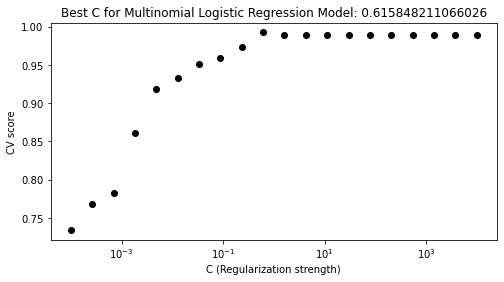

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, figsize=(8, 4))

# Initialize variables to track the best score and corresponding C value
best_score = 0
best_c = 0

# Iterate over range of C values 
for c in np.logspace(-4, 4, 20):
    # Instantiate the logistic regression model with the current C value
    log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=c, max_iter=1000)
    # Perform cross-validation and compute the mean score
    cv_score = cross_val_score(log_reg, X_train, y_train, cv=10).mean()
    # Plot the C value against its cross-validation score
    ax.scatter(c, cv_score, color="black")
    # Update the best score and C value if the current score is higher
    if cv_score > best_score:
        best_c = c
        best_score = cv_score
# Set the title and labels for the plot
ax.set(title=f"Best C for Multinomial Logistic Regression Model: {best_c}",
      xlabel="C (Regularization strength)",
      ylabel="CV score")
# Use a logarithmic scale for the x-axis to better display the wide range of C values
ax.set_xscale('log')
plt.show()

After cross-validating, we see that 0.61 is the best C value for the multinomial logistic regression model. This indicates an optimal balance between model complexity and generalization to new data, suggesting that it is neither overfit nor underfit. This value was determined to be the best for achieving high predictive performance on unseen data, indicating that this model is well-tuned for penguin species prediction/classification.

Next, lets fit the model on the training data and score the model on the testing data and then find the coefficients for each feature for each class (species). 

In [26]:
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=best_c, max_iter=1000)
log_reg.fit(X_train, y_train)
print("Score: ",log_reg.score(X_test, y_test), "\n")

# Retrieve the coefficients from the trained logistic regression model
coefficients = log_reg.coef_
# Get the names of the features used in the model
feature_names = X_train.columns
# Iterate over each set of coefficients corresponding to each class (species)
for i, class_coefficients in enumerate(coefficients):
    print(f"Class {i} Coefficients:")
    # Iterate over each feature and its corresponding coefficient
    for feature_name, coefficient in zip(feature_names, class_coefficients):
        print(f"{feature_name}: {coefficient}")

Score:  0.9848484848484849 

Class 0 Coefficients:
Culmen Length (mm): -0.8782235401903531
Culmen Depth (mm): 1.4374907653844617
Sex: 0.7442527931766973
Class 1 Coefficients:
Culmen Length (mm): 0.35643973450618094
Culmen Depth (mm): 0.5532276864603143
Sex: -1.6801557470823583
Class 2 Coefficients:
Culmen Length (mm): 0.5217838057040957
Culmen Depth (mm): -1.990718451750981
Sex: 0.9359029539226505


*Analysis of Multinomial Logistic Regression Coefficients*:

Our logistic regression model achieved a high accuracy score of 0.984 on the test data. This indicates that the model is highly effective in classifying penguin species based on the given features. Let's analyze the coefficients for each class:

1. Adelie (Class 0) Coefficients:
    - Culmen Length (mm): -0.879. A decrease in culmen length increases the likelihood of a penguin being classified as Adelie.
    - Culmen Depth (mm): 1.439. A greater culmen depth is a strong indicator of a penguin being an Adelie.
    - Sex: 0.742. This positive coefficient suggests a trend where one sex (likely males if encoded as 1) is more likely to be an Adelie.
2. Chinstrap (Class 1) Coefficients:
    - Culmen Length (mm): 0.357. A slight increase in culmen length tends to indicate a Chinstrap penguin.
    - Culmen Depth (mm): 0.553. Similar to culmen length, a moderate increase in depth is indicative of the Chinstrap species.
    - Sex: -1.679. A negative coefficient for sex implies that the other sex (likely females if encoded as 0) is more likely to be Chinstrap.
3. Gentoo (Class 2) Coefficients:
    - Culmen Length (mm): 0.522. Gentoos tend to have longer culmen lengths.
    - Culmen Depth (mm): -1.991. A significant negative coefficient, suggesting that Gentoos have shallower culmens compared to others.
    - Sex: 0.937. This positive coefficient again implies a higher likelihood of one sex (likely males) being a Gentoo.

In conclusion, the model reveals distinct morphological differences between penguin species, with clear variations in culmen dimensions and potential sex-based distinctions. These insights align well with known biological characteristics of these penguin species, reaffirming the model's validity.


#### **2. Plot Decision Regions**

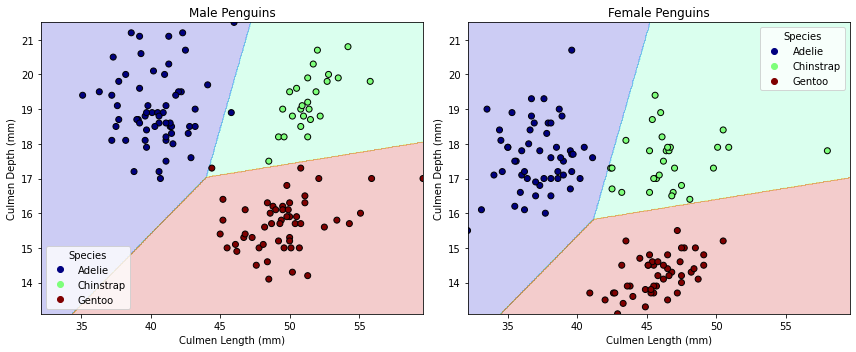

In [27]:
# Decision regions for training data
plot_regions(log_reg, X_train, y_train)

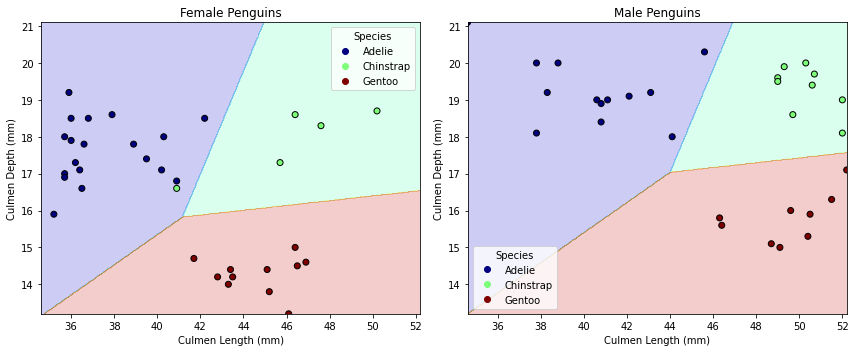

In [28]:
# Decision regions for testing data
plot_regions(log_reg, X_test, y_test)

The decision region plots for the multinomial logistic regression model demonstrate the model's ability to distinguish between the three penguin species based on culmen length and depth for both male and female penguins (as previously mentioned, male and female penguins have different ranges of values for these features). In the training data, the model appears to have found a boundary that effectively separates the species. Moving to the testing data, the boundaries remain consistent, suggesting that the model generalizes well to unseen data. The minimal overlap between species in the testing data indicates a high level of accuracy, which is in line with the high score reported.

#### **3. Confusion Matrix**

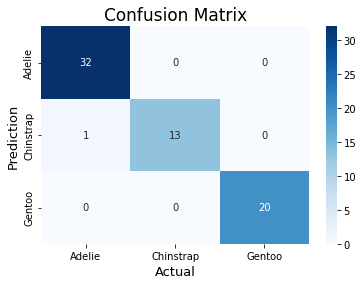

In [29]:
cm_heat_map(log_reg, X_test, y_test)

This confusion matrix, presented as a heat map, shows that the classification model correctly identifies all Gentoo and nearly all Adelie penguins, with just a single Chinstrap penguin misclassified as Adelie (a false negative for Chinstrap and a false positive for Adelie). There are no other misclassifications, highlighting the model's effectiveness at distinguishing between species.

In [30]:
y_predict_log_reg = log_reg.predict(X_test)
classification_report_log_reg = classification_report(y_test, y_predict_log_reg, zero_division = "warn")
print(classification_report_log_reg)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        32
           1       1.00      0.93      0.96        14
           2       1.00      1.00      1.00        20

    accuracy                           0.98        66
   macro avg       0.99      0.98      0.98        66
weighted avg       0.99      0.98      0.98        66



On the left column, 0 means Adelie, 1 means Chinstrap, and 2 means Gentoo. This classification report shows
1. High precision for all species, with species 1 (Chinstrap) and 2 (Gentoo) achieving 100%. 
2. Excellent recall, especially for species 0 (Adelie) and 2. Species 1 has slightly lower recall at 93%.
3. F1-scores are strong across all species, indicating a well-balanced model between precision and recall.
4. The overall model accuracy is 98%, which is a great score, demonstrating its effectiveness in correctly identifying penguin species.

Multinomial Logistic Regression is great for sorting data into multiple categories and makes understanding the influence of different features straightforward. However, it is important to note that it may not be the best fit for intricate, nonlinear patterns since it operates on the principle that predictors and log-odds are linearly related. This can make it less effective for more complex datasets where such straightforward relationships do not exist. The decision regions can illustrate this. The model may misclassify outliers, particularly those that fall outside the main species clusters or within regions dominated by another species, due to its inability to adjust to data points that go against established decision boundaries. Additionally, the fixed and linear nature of these boundaries can result in inaccuracies in real-world situations where data patterns are more complex and less predictable. This can highlight limitation in handling borderline or atypical cases.

The high accuracy of the logistic regression model, coupled with clear decision boundaries in the plots, suggests that for the specific features we've selected, the relationships in the penguin dataset are sufficiently linear. Essentially, this means that the differences between penguin species, in terms of culmen length, culmen depth, and sex, can be effectively distinguished using linear methods. This doesn't imply that the entire dataset lacks complexity or only contains linear relationships, but for our classification task, linear relationships provide an accurate prediction framework.

## **Support Vector Machines Model**

Support Vector Machine models provide analysis of data for classification and regression.

There are two types of svm models:
1. Linear svm: Separates the data in a linear format. If the data set is separated into two using a straight line, data is linearly separable.
2. Nonlinear svm: This is used when data is nonlinearly separated. If the data cannot be separated into two using a straight line, data is nonlinear. 

In this project, I am using the nonlinear svm based on the data. The first step in building our Support Vector Machine model is to conduct cross-validation to find the best complexity parameters to use. In Support Vector Machines (SVMs), the hyperparameter gamma plays a critical role in balancing model complexity and generalization. A lower gamma value encourages a wider margin, reducing the risk of overfitting by prioritizing simpler decision boundaries.

#### **1. Cross-Validation**

Optimal Gamma: 0.08
Score: 0.9886039886039886


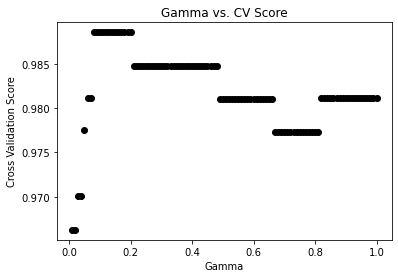

In [31]:
from sklearn import svm

# Cross Validation: SVM

fig, ax = plt.subplots(1)

high_score = 0 # placeholder for highest score
optimal_gamma = 0 # placeholder for best "C"

for i in np.linspace(0.01, 1, 100): # checking 100 possible values between 0.01 and 1
    SVM = svm.SVC(gamma = i) 
    CV = cross_val_score(SVM, X_train, y_train, cv = 10).mean() # cross validation
    ax.scatter(i, CV, color = 'black')

    if high_score < CV: # check for new high score and update variables accordingly
        high_score = CV
        optimal_gamma = i
        
ax.set(title = "Gamma vs. CV Score", xlabel = "Gamma", ylabel = "Cross Validation Score")
print("Optimal Gamma: " + str(optimal_gamma) + "\n" + "Score: " + str(high_score))

After cross-validation, we see that 0.08 is our optimal gamma value for the SVM model. This indicates an optimal balance between model complexity and generalization to new data, suggesting that it is neither overfit nor underfit. This value was determined to be the best for achieving high predictive performance on unseen data, indicating that this model is well-tuned for penguin species prediction/classification.

In [32]:
SVM = svm.SVC(gamma = optimal_gamma)
SVM.fit(X_train, y_train,)
SVM.score(X_test, y_test)

0.9696969696969697

The score is high for the SVM model, so I will now further evaluate the model using decision regions and a confusion matrix. This score is similar to what we got during the cross-validation, so we are not worried about overfitting in the model. 

#### **2. Plotting Decision Regions**

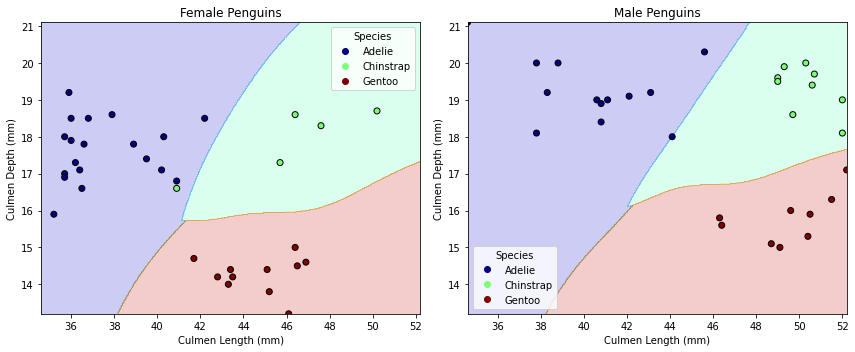

In [33]:
# Decision regions for testing data
plot_regions(SVM, X_test, y_test)

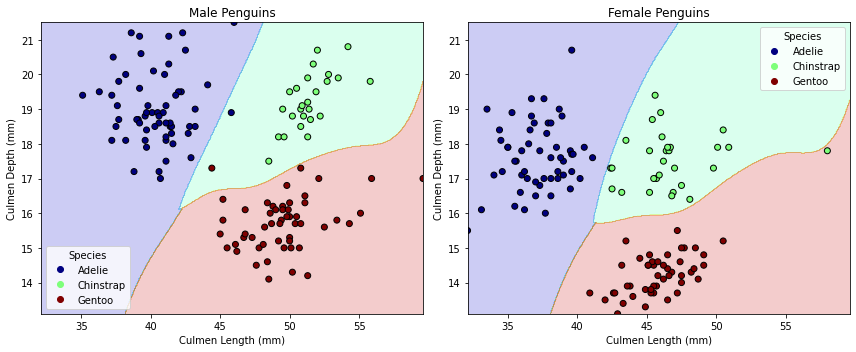

In [34]:
# Decision regions for training data
plot_regions(SVM, X_train, y_train)

Looking at these decision regions, we can see that our model correctly predicted penguin species for the most part.

#### **3. Confusion Matrix**

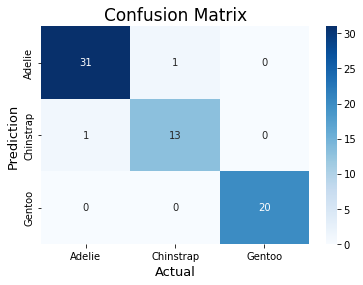

In [35]:
cm_heat_map(SVM, X_test, y_test)

Looking at our confusion matrix, I incorrectly predited two penguins. The SVM model incorrectly predicted an Adelie penguin as a Chinstrap penguin and a Chinstrap penguin as an Adelie. To understand why our SVM model would incorrectly predict the species of some penguins, we must understand how the model works. SVM works best when the data is linearly separable, meaning it can be separated into classes by a straight line or hyperplane. It could be that our data is not linearly separable, so the model could have trouble finding the best decision boundary. Similarly, an outlier may influence the decision boundary causing misclassications. 

#### **4. Classification Report**

In [36]:
y_predict_svm = SVM.predict(X_test)
classification_report_svm = classification_report(y_test, y_predict_svm, zero_division = "warn")
print(classification_report_svm)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        32
           1       0.93      0.93      0.93        14
           2       1.00      1.00      1.00        20

    accuracy                           0.97        66
   macro avg       0.97      0.97      0.97        66
weighted avg       0.97      0.97      0.97        66



Here is a report of our SVM model's precision, recall, f1-score, and accuracy. Each score across species is high which is a good indicator. Another takeaway is that the model was not as strong in predicting Species 1 (Chinstrap) than the others since it has lower scores across the board.

## **Random Forest Model**

Random forest is one machine learning technique. It is helpful to solve classification or regression problems. It works by combing multiple classifiers to solve a complex problem. The algorithm consists of many individual decision trees and considers a subset of features, where regular decision trees consider all features. 

There are some advantages to invoking the random forest model:
1. This model makes it easy to determine which features are important and have contributions to the model.
2. The model is also flexible in that it can handle the data set for both regression and classification.
3. This model also has a lower risk of overfitting since the data is fixed in nodes and leaves. 

First do Cross Validation in order to see what the best depth for the random forest model is.

#### **1. Cross-Validation**

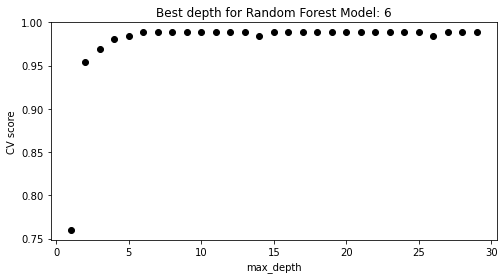

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

fig, ax = plt.subplots(1, figsize = (8,4))

best_score = 0


for d in range(1,30):
    T_rf = RandomForestClassifier(max_depth = d)
    cv_score = cross_val_score(T_rf, X_train, y_train, cv = 10).mean()
    ax.scatter(d, cv_score, color = "black")
    if cv_score > best_score:
        best_depth = d
        best_score = cv_score
        
ax.set(title = "Best depth for Random Forest Model: " + str(best_depth),
      xlabel = "max_depth",
      ylabel = "CV score");

Using cross-validation, we know that 6 is the best depth for the random forest model. This is a generally good number because too high of depth can cause overfitting, thus a depth of 6 should avoid that.

Next, I fit the random forest classifier on the training data and score the model on the testing data.

In [38]:
rf = RandomForestClassifier(max_depth = best_depth) 
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9696969696969697

Since the test score is over 0.90, this is a good sign that the model is working well. 

#### **2. Plot Decision Regions**

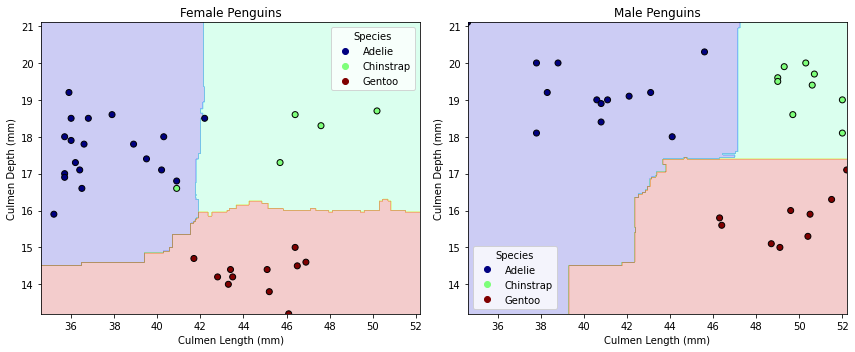

In [39]:
# Decision Region on testing data
plot_regions(rf, X_test, y_test)

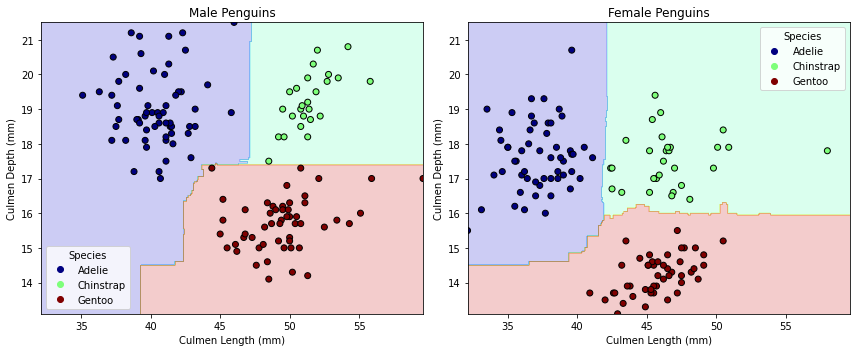

In [40]:
# Decision Region on training data
plot_regions(rf, X_train, y_train)

I wanted to reiterate how in all of the decision regions, we can see how the model predicts the species based on culmen length and culmen depth. There are two decision regions, one for each sex, because males and females generally had different ranges of values for their culmen lengths and depths, thus necessatating that the predictions be broken up by sex.

Between the training and testing data, we see overall similar graphs so we can conclude that the model worked well and that overfitting was not an issue.

#### **3. Confusion Matrix**

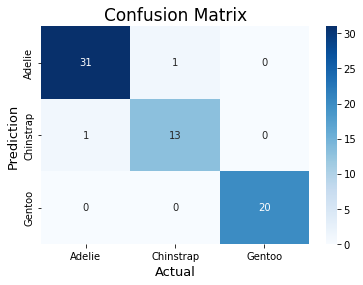

In [41]:
# Confusion Matrix
cm_heat_map(rf, X_test, y_test)

This is the confusion matrix, presented as a heat map. Here we see that the predictions were generally correct, meaning that the rf model correctly predicted that the penguin was a Gentoo when it was a Gentoo, a Chinstrap when it was a Chinstrap, and an Adelie when it was Adelie. There were only two cases total where the model presented a false positive or false negative for the species. 

#### **4. Classification Report**

In [42]:
y_predict_rf = rf.predict(X_test)
classification_report_rf = classification_report(y_test, y_predict_rf, zero_division = "warn")
print(classification_report_rf)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        32
           1       0.93      0.93      0.93        14
           2       1.00      1.00      1.00        20

    accuracy                           0.97        66
   macro avg       0.97      0.97      0.97        66
weighted avg       0.97      0.97      0.97        66



In this classification report, we see how well the model performed. On the left column, 0 means Adelie, 1 means Chinstrap, and 2 means Gentoo. For the precision, we can see that it ranged from 0.93 to 1, meaning that overall the precision was high for the model. The f1 score, which represent the weighted harmonic mean of precision and recall was also 0.93 to 1. The accuracy for the model was 0.97, which is also a good score and we would not want it to be 1 because that would be indicative of overfitting. 

However, a weakness with the Random Forest model is that the high precision score over 0.9 could be a possible error with the model as it may have fit the data well but lacks generalizability to other data, meaning that overfitting is a potential concern. If it is too high this is also a potential indicator of overfitting the data. However, since the precision was similar on both the training and testing data, we can be sure that overfitting did not occur. 

# **5) Discussion**

My analysis suggests that the best model for predicting penguin species is the Multinomial Logistic Regression, using Sex, Culmen Length, and Culmen Depth as features. This model has demonstrated commendable performance, with a high accuracy of approximately 98% and balanced precision-recall trade-offs across species. This indicates the model's robustness in identifying the correct species with minimal errors. Additionally, Multinomial Logistic Regression provides a probabilistic perspective that complements ensemble methods like Random Forest and margin-based methods like SVM. The model's coefficients offer valuable insights into how each feature influences the likelihood of a penguin belonging to a particular species. For example, a positive coefficient for 'Culmen Depth' in Class 0 (Adelie) implies that an increase in Culmen Depth increases the likelihood of the penguin being from this species. The model strikes a good balance between learning from the training data and generalizing to new data, with training and testing scores of 0.99 and 0.98, respectively, showing strong predictive abilities without overfitting. In comparison, the SVM and Random Forest models had slightly lower scores and incorrectly predicted the species of two penguins each.

To improve the models, increasing the number of observations would be the first step. With less than 400 observations, the dataset is small, and more data would help enhance the models' performance. More data could also help reinforce the features' relevance or reveal new relationships to implement in the models. However, more data may introduce more outliers, which is a key consideration in model training and development. The models perform well when predicting data similar to the training data but may fail with outlier data. Additionally, I was cautious of overfitting, which can occur when a model fits the training data too well but lacks generalizability. Fortunately, none of the models exhibited overfitting, as evidenced by the similar training and testing scores. This indicates that the models are generalizable and reliable for classifying penguin species based on the selected features.